In [138]:
%matplotlib inline

In [139]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'C:/Users/Flora/datapython/data/drinks.csv'
drinks = pd.read_csv(file_path) 

file_path2 = 'C:/Users/Flora/datapython/country.csv'
country = pd.read_csv(file_path2) 

In [140]:
print(country.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  239 non-null    object
 1   number   239 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB
None


In [141]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [142]:
#데이터 합침
data = pd.merge(drinks, country, on = 'country', how = 'inner')

In [143]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       141 non-null    object 
 1   beer_servings                 141 non-null    int64  
 2   spirit_servings               141 non-null    int64  
 3   wine_servings                 141 non-null    int64  
 4   total_litres_of_pure_alcohol  141 non-null    float64
 5   continent                     128 non-null    object 
 6   number                        141 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 8.8+ KB
None


In [144]:
data['total_servings'] = data['beer_servings'] + data['wine_servings'] + data['spirit_servings']

In [145]:
data['alcohol_rate'] = data['total_servings'] / data['number']
data['alcohol_rate'] = data['alcohol_rate'].fillna(0)

In [146]:
country_with_rank = data[['country','alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by = ['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
101,Niue,0.259868
105,Palau,0.021899
3,Andorra,0.009123
49,Grenada,0.006111
129,Tuvalu,0.005490


In [147]:
data['pure_rate'] = data['total_litres_of_pure_alcohol'] / data['number']
data['pure_rate'] = data['pure_rate'].fillna(0)

country_with_ranks = data[['country','pure_rate']]
country_with_ranks = country_with_ranks.sort_values(by = ['pure_rate'], ascending=0)
country_with_ranks.head(5)

,country,pure_rate
101,Niue,0.004605
105,Palau,0.000385
3,Andorra,0.000163
49,Grenada,0.000109
129,Tuvalu,0.000098


In [148]:
country_with_ranks

,country,pure_rate
101,Niue,0.004605
105,Palau,0.000385
3,Andorra,0.000163
49,Grenada,0.000109
129,Tuvalu,0.000098
...,...,...
89,Monaco,0.000000
86,Mauritania,0.000000
60,Iran,0.000000
78,Libya,0.000000


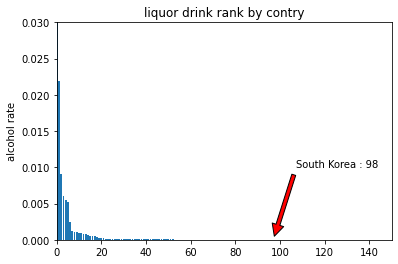

In [149]:
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 150, 0, 0.03])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1),
             xy = (korea_rank, korea_alc_rate),
             xytext = (korea_rank + 10, korea_alc_rate+0.01),
             arrowprops = dict(facecolor = 'red', shrink = 0.05))

plt.show()

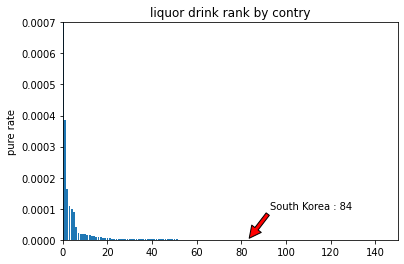

In [150]:
country_lists = country_with_ranks.country.tolist()
x_poss = np.arange(len(country_lists))
ranks = country_with_ranks.pure_rate.tolist()

bar_lists = plt.bar(x_poss, ranks)
bar_lists[country_list.index("South Korea")].set_color('r')
plt.ylabel('pure rate')
plt.title('liquor drink rank by contry')
plt.axis([0,150, 0, 0.0007])

korea_ranks = country_lists.index("South Korea")
korea_alc_rates = country_with_ranks[country_with_ranks['country'] == 'South Korea']['pure_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_ranks + 1),
             xy = (korea_ranks, korea_alc_rates),
             xytext = (korea_ranks + 10, korea_alc_rates+0.0001),
             arrowprops = dict(facecolor = 'red', shrink = 0.05))

plt.show()